# Import necessary libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Import custom functions from script


In [3]:
# Adjust the path to point to the 'scripts' directory
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../scripts')))
from data_processing import (
   load_data, summarize_data, check_missing_values, 
    plot_histograms, 
    plot_categorical_counts, 
    detect_outliers
)

# Load the dataset


In [4]:
file_path = '../../data/MachineLearningRating_v3.txt'
# Replace delimiter with the correct one
data = pd.read_csv(file_path, delimiter='|')  # Change delimiter as needed

# Display the first few rows of the dataframe
data.head()

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\607214028.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path, delimiter='|')  # Change delimiter as needed


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [5]:
# Handle missing values for categorical columns
categorical_cols = ['Bank', 'AccountType', 'MaritalStatus', 'Gender', 'VehicleType', 'make', 'Model', 
                    'Citizenship', 'LegalType', 'Title', 'Language', 'MainCrestaZone', 'SubCrestaZone', 
                    'ItemType', 'bodytype', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 
                    'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 
                    'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 
                    'StatutoryClass', 'StatutoryRiskType']

for col in categorical_cols:
    mode_value = data[col].mode()[0]  # Fill missing values with the mode (most frequent value)
    data[col].fillna(mode_value, inplace=True)

# Handle missing values for numerical columns
numerical_cols = ['mmcode', 'Cylinders', 'CustomValueEstimate', 'NumberOfDoors', 'cubiccapacity', 
                  'kilowatts', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims', 
                  'NumberOfVehiclesInFleet']

for col in numerical_cols:
    median_value = data[col].median()  # Fill missing values with the median
    data[col].fillna(median_value, inplace=True)

# Handle missing values for specific object columns by filling with 'Unknown'
object_cols_with_placeholders = ['AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 
                                 'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder']

for col in object_cols_with_placeholders:
    data[col].fillna('Unknown', inplace=True)

# Convert RegistrationYear and VehicleIntroDate to appropriate types
data['RegistrationYear'] = pd.to_numeric(data['RegistrationYear'], errors='coerce')
data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], errors='coerce')

# Handle missing values for binary columns (like IsVATRegistered) by assuming False for missing
binary_cols = ['IsVATRegistered']
for col in binary_cols:
    data[col].fillna(False, inplace=True)

# After handling, check for any remaining missing values
print("\nRemaining Missing Values after handling:")
print(data.isnull().sum())


C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\1033925859.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(mode_value, inplace=True)
C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\1033925859.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 


Remaining Missing Values after handling:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype              

# Data Summarization


In [6]:
desc_stats, data_types = summarize_data(data)
print("\nDescriptive Statistics:")
print(desc_stats)


Descriptive Statistics:
       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  1.000098e+06   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.488056e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360059e+07   

       RegistrationYear     Cylinders  cubiccapacity     kilowatts  \
count      1.000098e+06  1.000098e+06   1.000098e+06  1.000098e+06   
mean       2.010225e+03  4.046616e+00   2.466869e+03  9.721553e+01   
min        1.987000e+03  0.000000e+00   0.000000e+00  0.000000e+00   
25%        2.008000e+03  4.000000e+00   2.2370

In [7]:
print("\nData Types of Columns:")
print(data_types)


Data Types of Columns:
UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth                    object
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                         

# Data Quality Assessment


In [8]:
print("\nMissing Values:")
print(check_missing_values(data))



Missing Values:
UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                              0
AccountType                       0
MaritalStatus                     0
Gender                            0
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                            0
VehicleType                       0
RegistrationYear                  0
make                              0
Model                             0
Cylinders                         0
cubiccapacity                     0
kilowatts                         0
bodytype                          0
NumberOfDoo

##  Categorize Columns


In [9]:
# Define columns
numerical_cols = ['mmcode', 'Cylinders', 'CustomValueEstimate', 'NumberOfDoors', 'cubiccapacity', 
                  'kilowatts', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims', 
                  'NumberOfVehiclesInFleet']

categorical_cols = ['Bank', 'AccountType', 'MaritalStatus', 'Gender', 'VehicleType', 'make', 'Model', 
                    'Citizenship', 'LegalType', 'Title', 'Language', 'MainCrestaZone', 'SubCrestaZone', 
                    'ItemType', 'bodytype', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 
                    'NewVehicle', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency', 
                    'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 
                    'StatutoryClass', 'StatutoryRiskType']

# Univariate Analysis


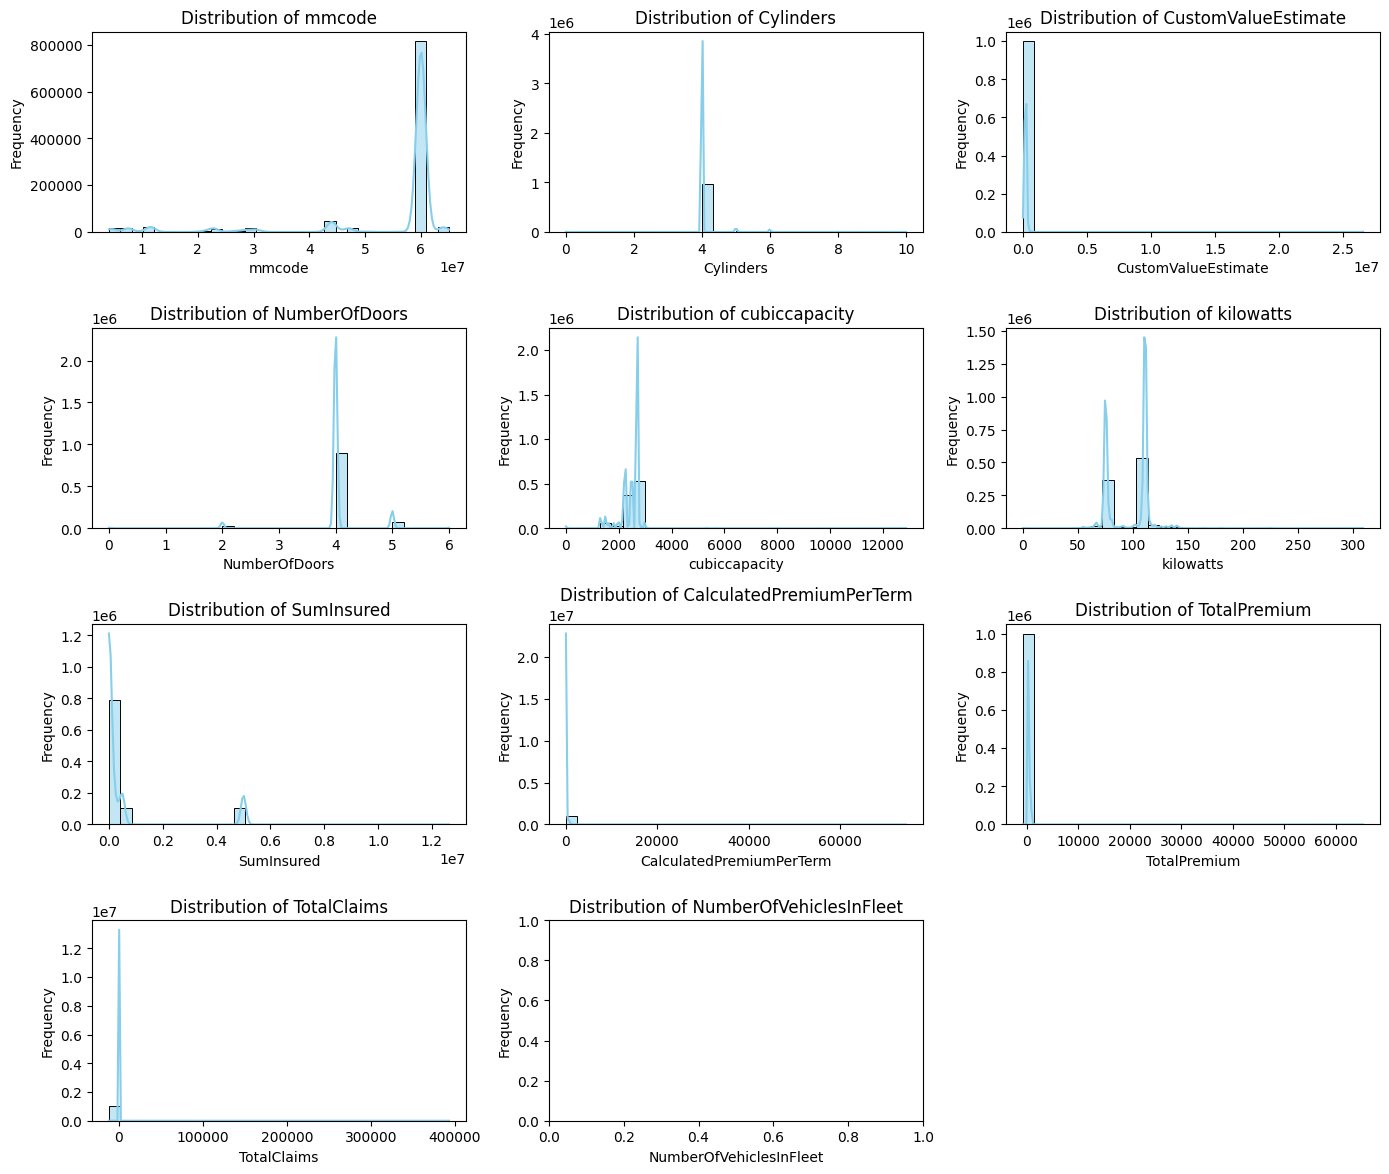

In [10]:
# Univariate Analysis for Numerical Columns
plt.figure(figsize=(14, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 3, i)  # Adjust grid size based on the number of numerical columns
    sns.histplot(data[col].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


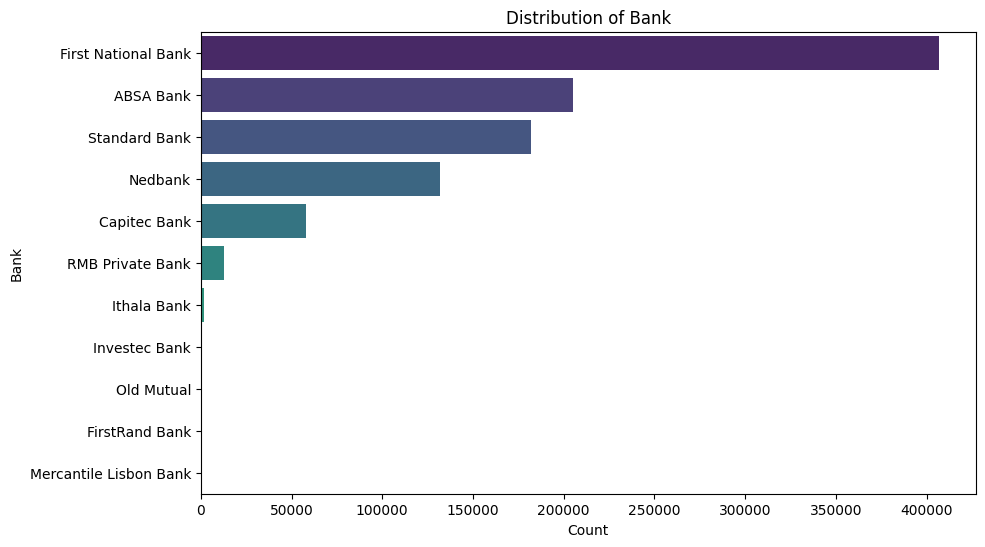

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


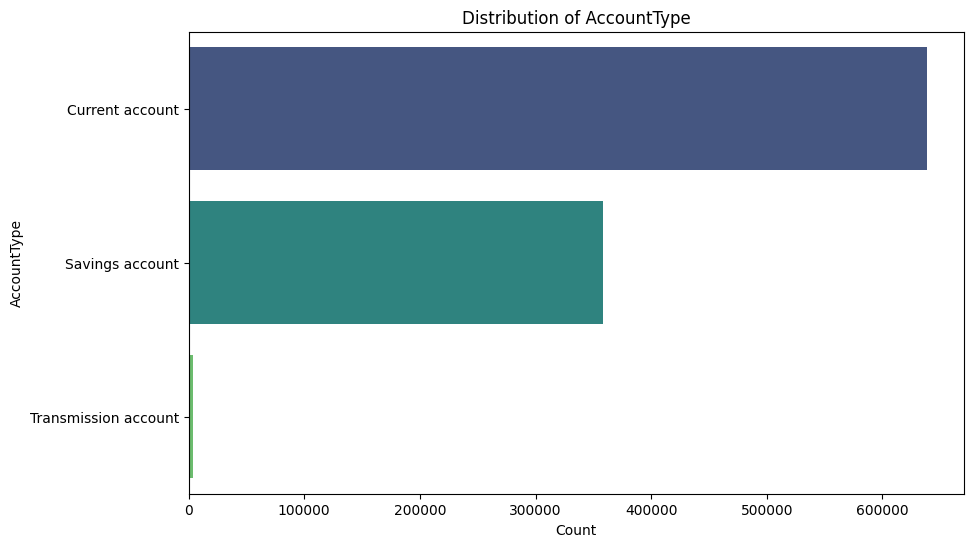

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


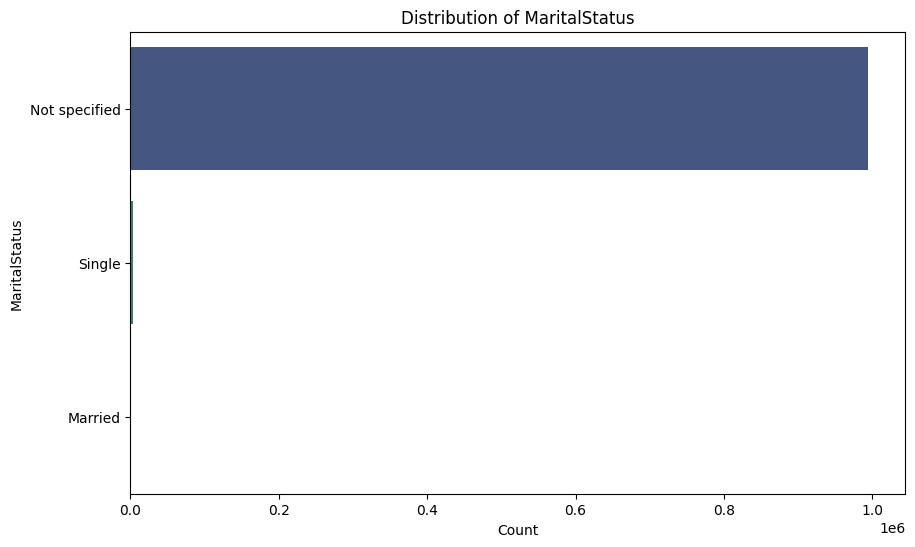

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


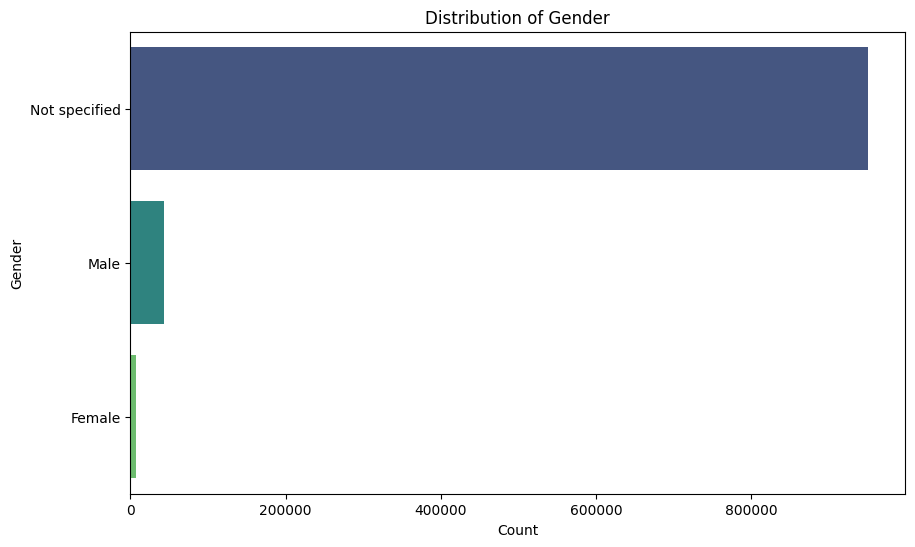

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


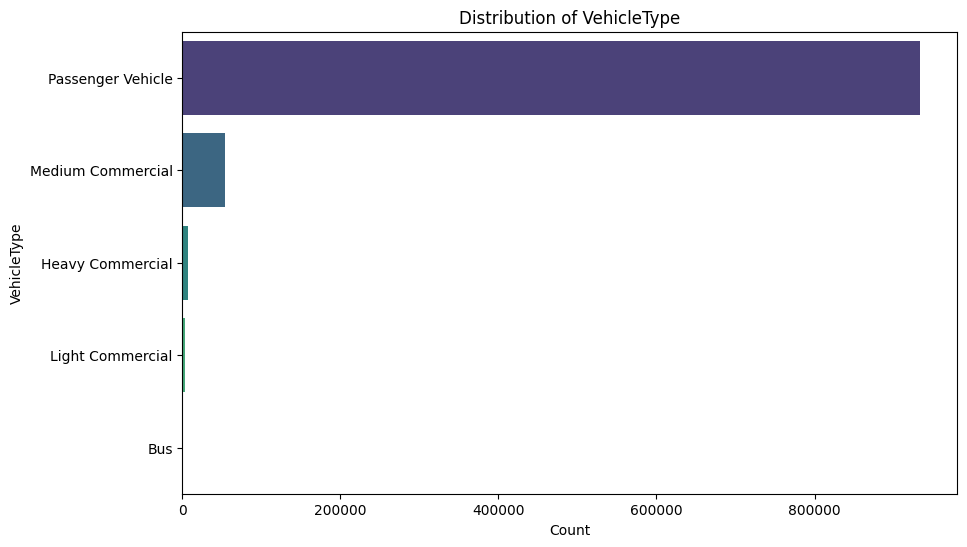

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


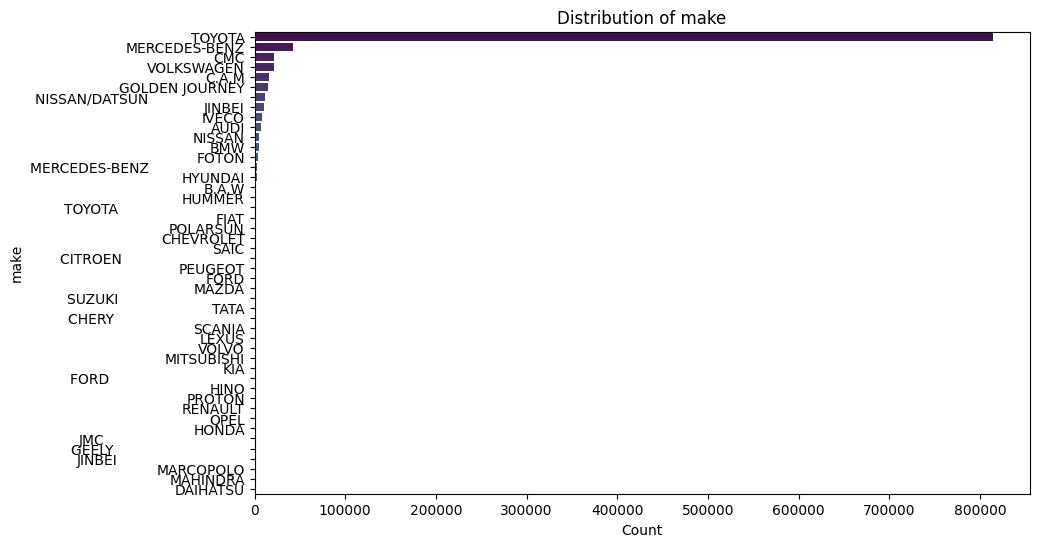

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


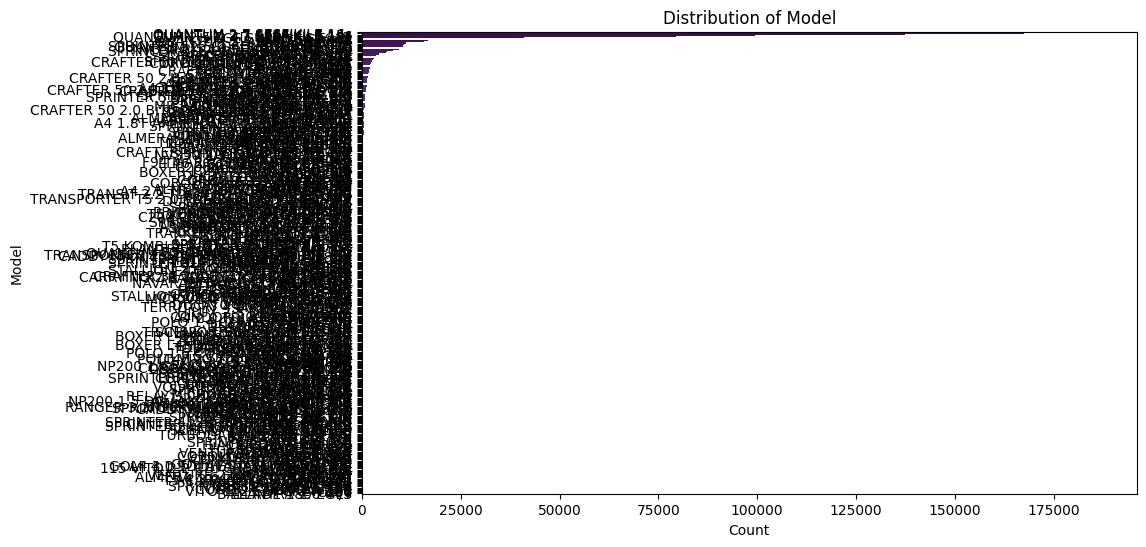

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


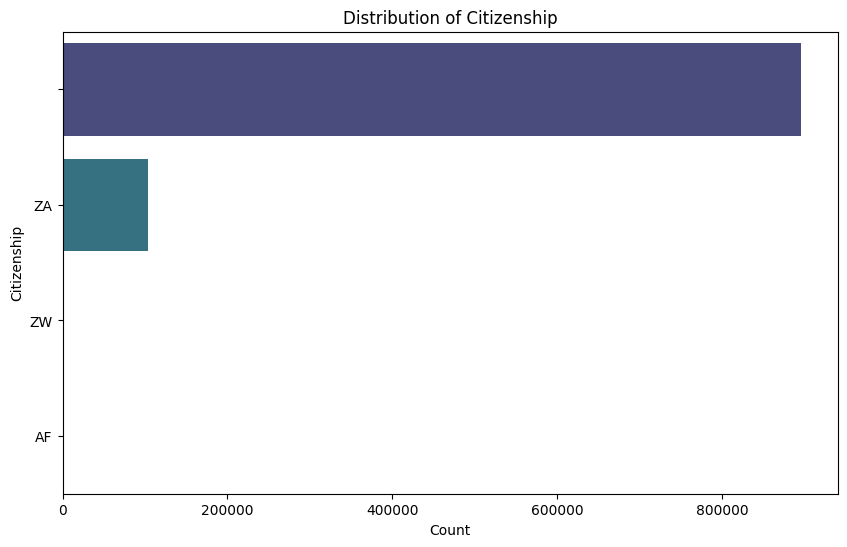

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


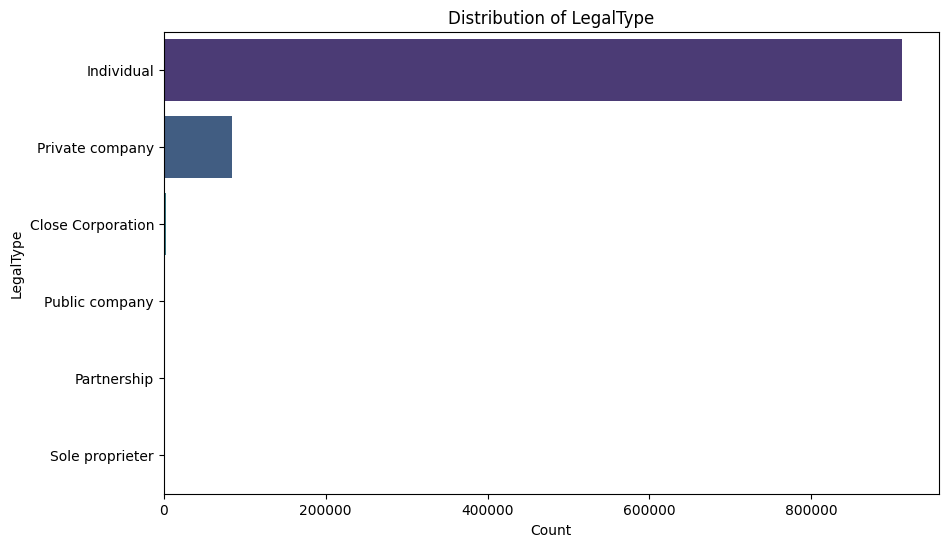

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


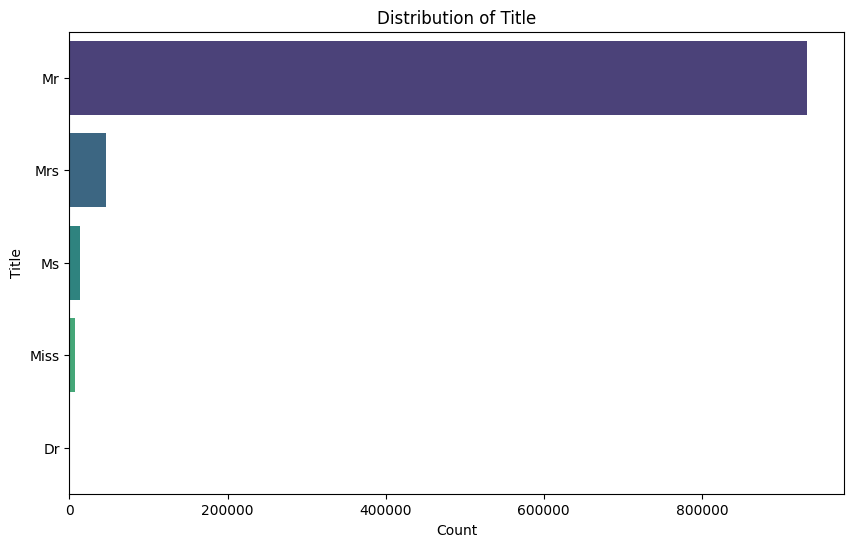

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


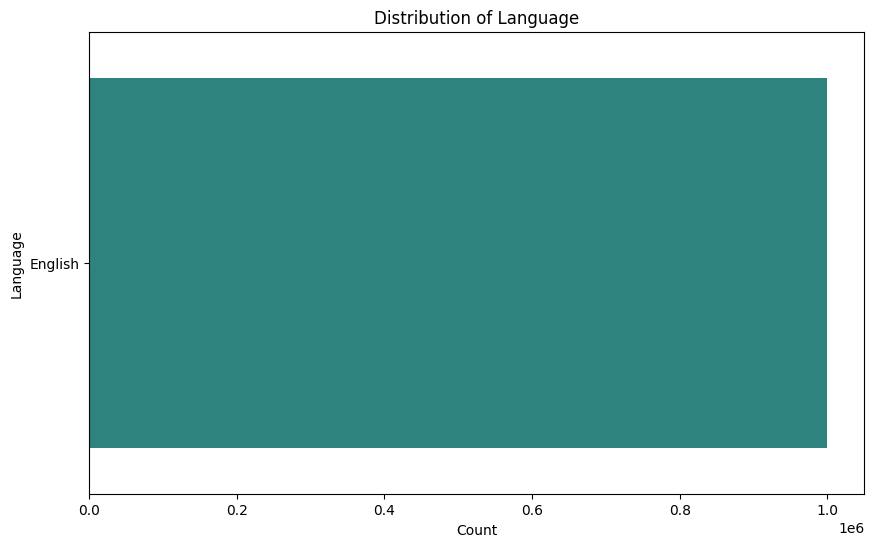

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


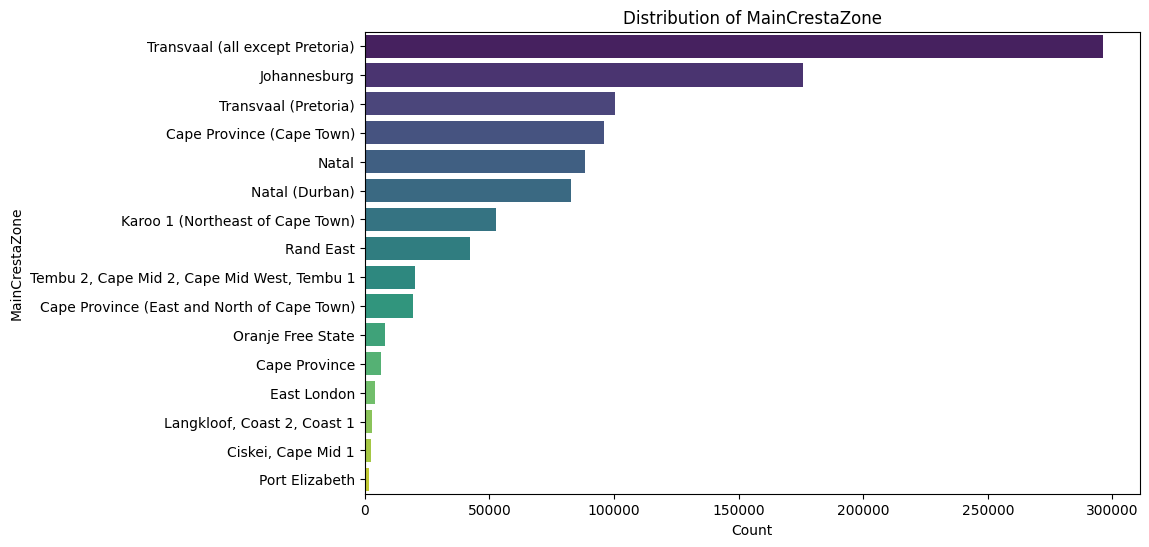

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


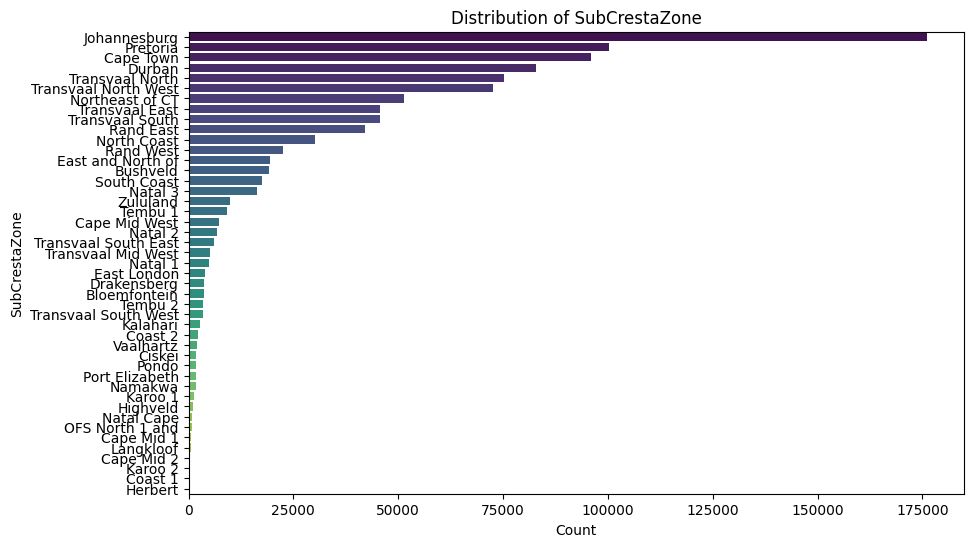

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


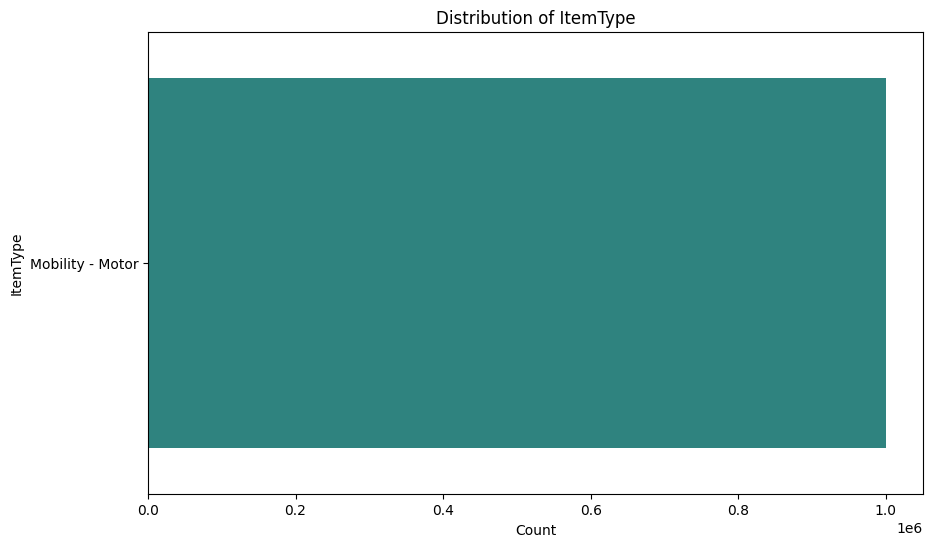

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


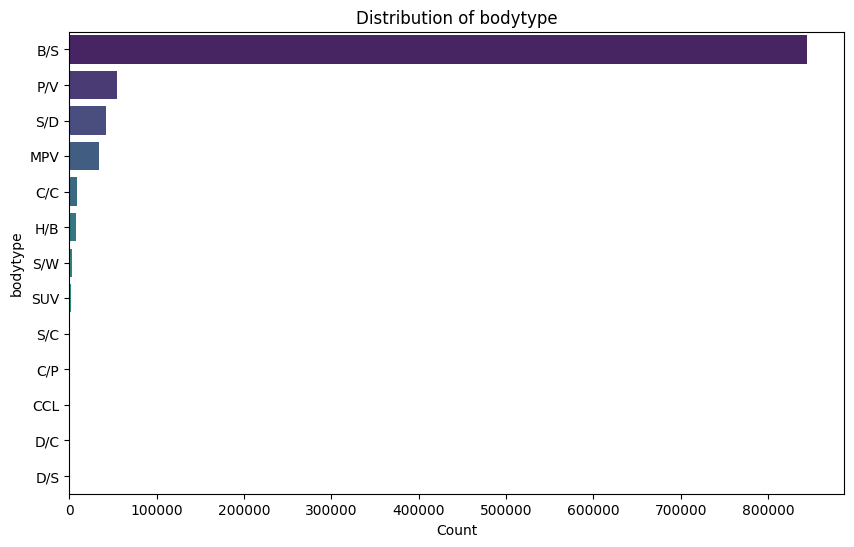

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


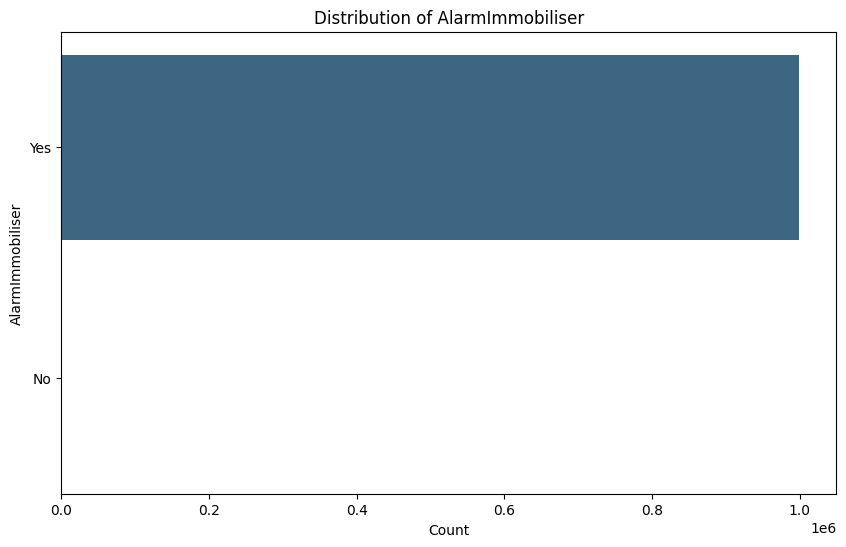

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


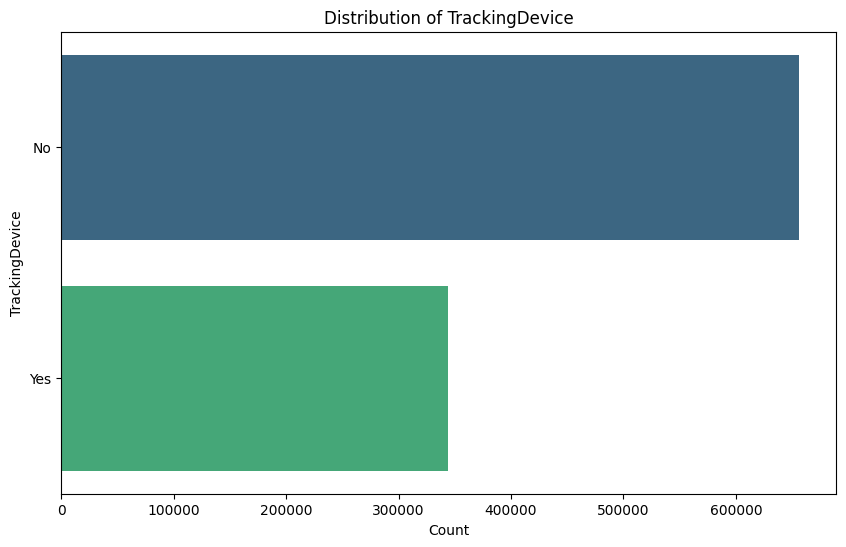

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


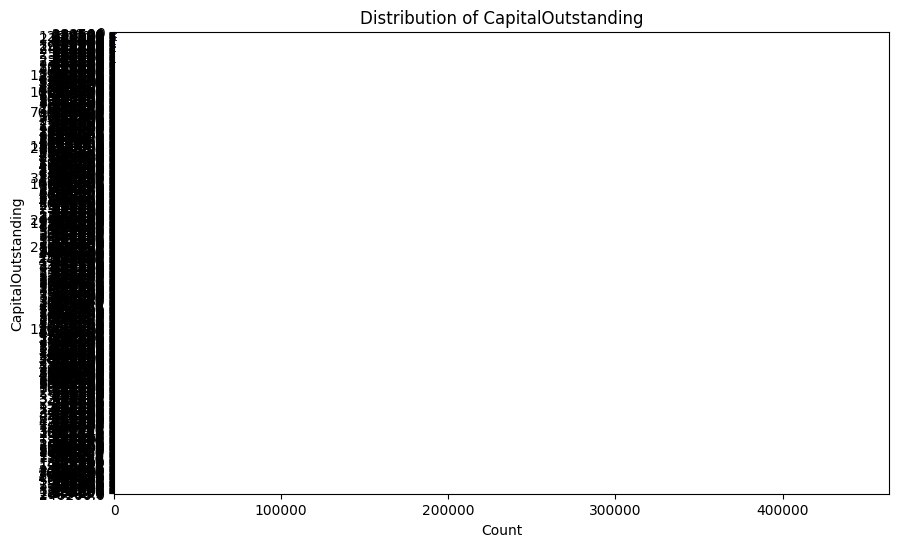

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


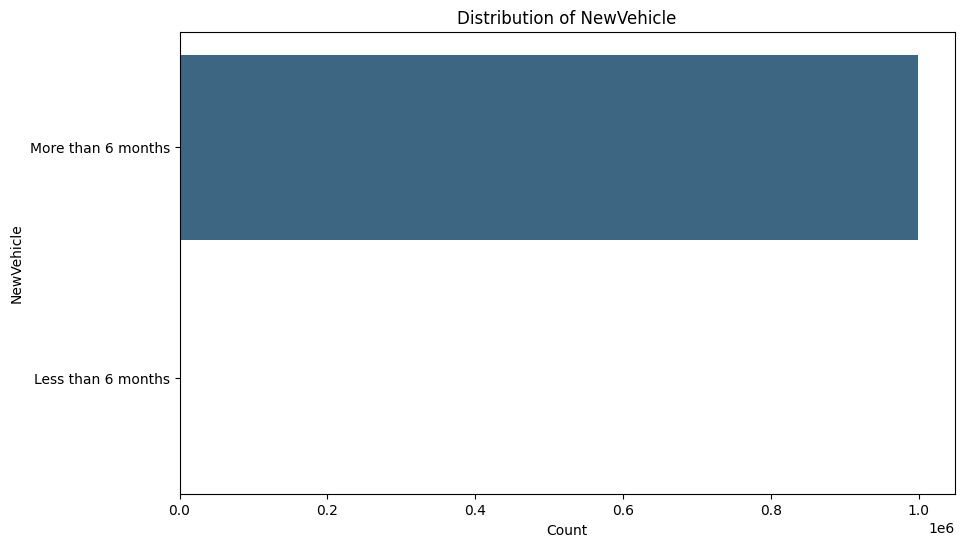

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


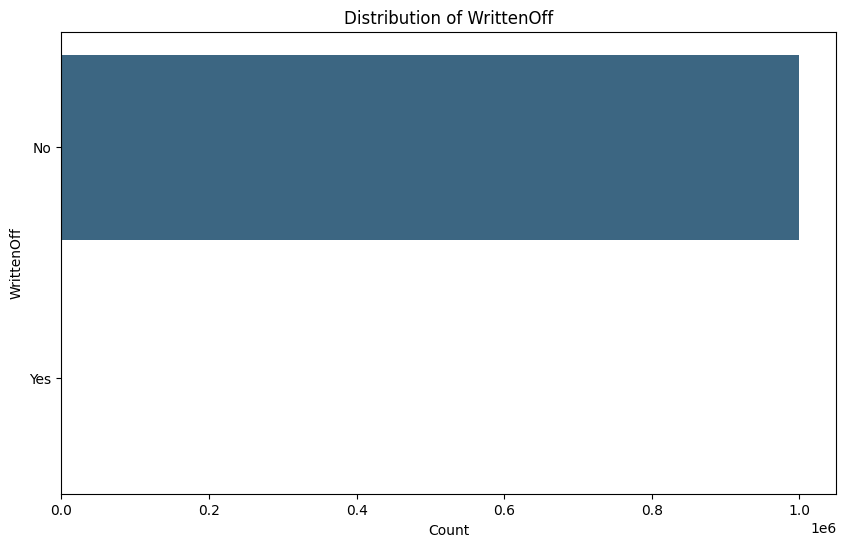

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


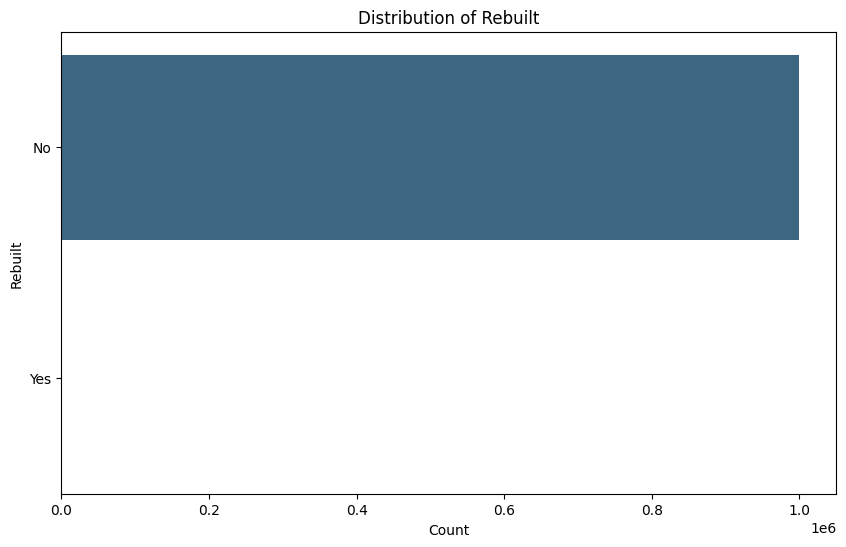

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


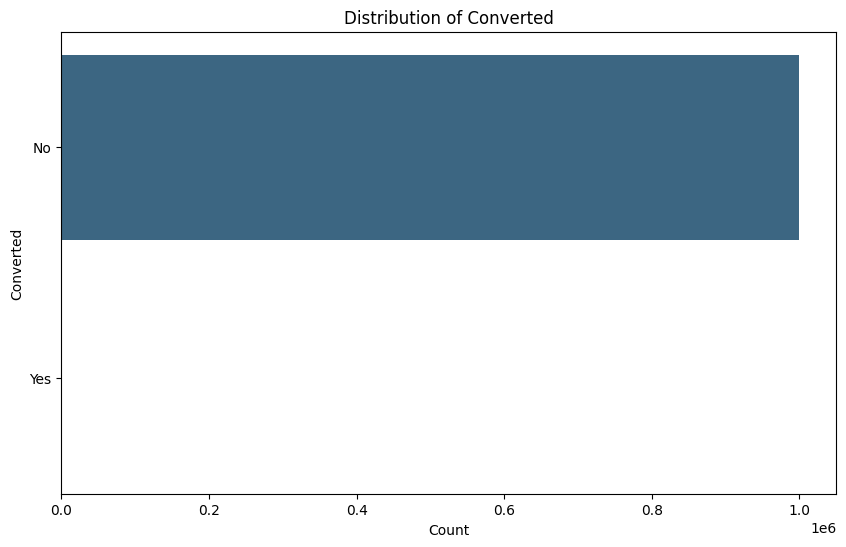

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


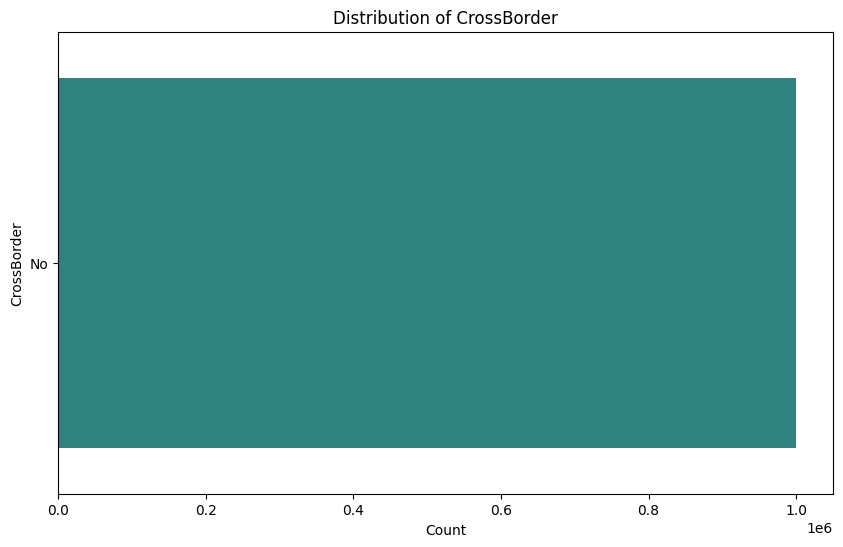

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


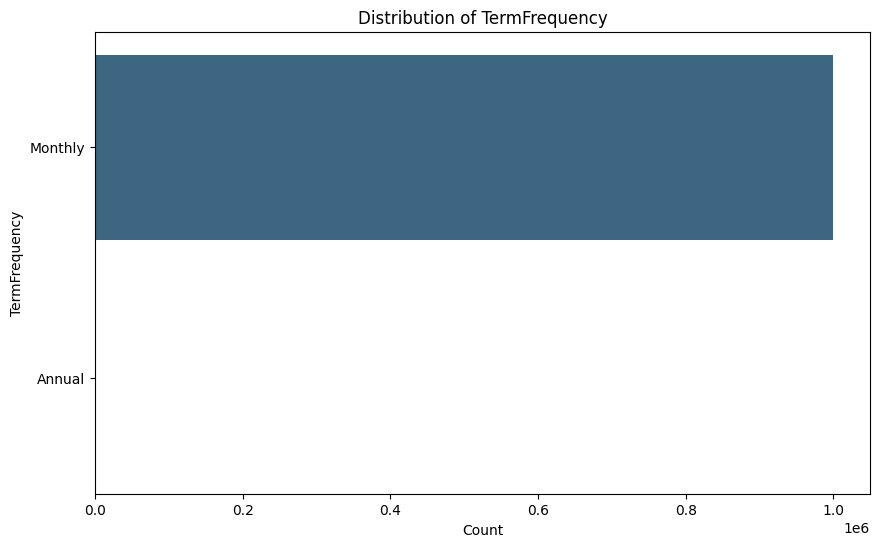

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


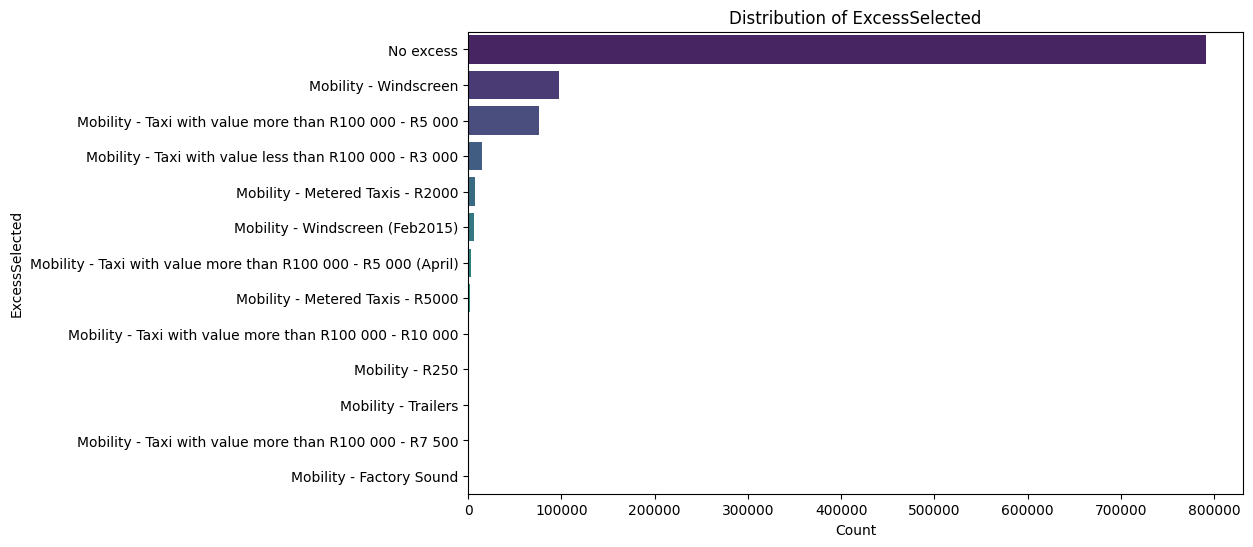

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


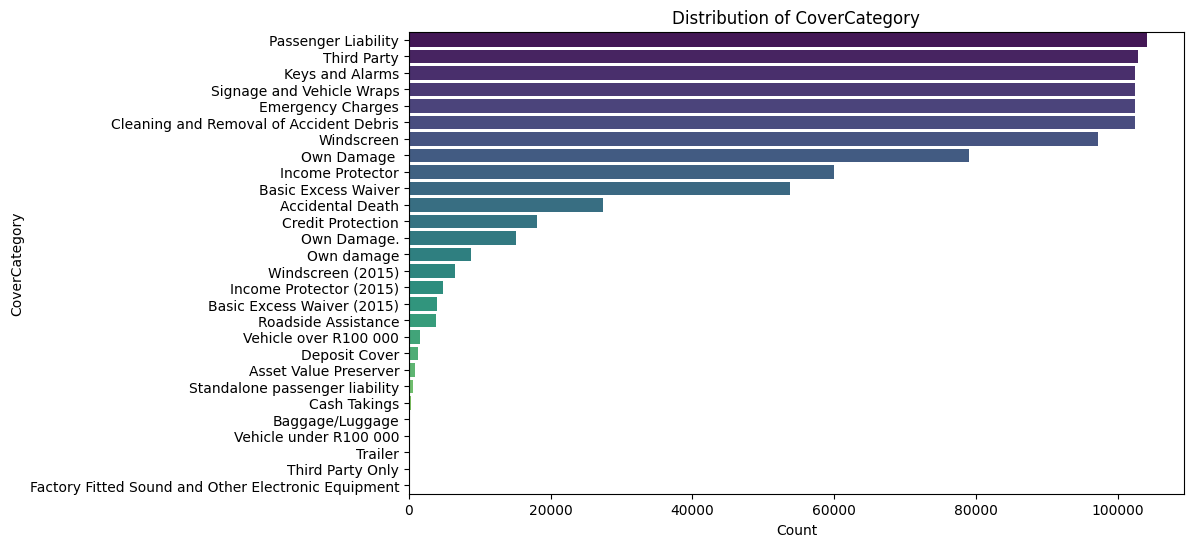

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


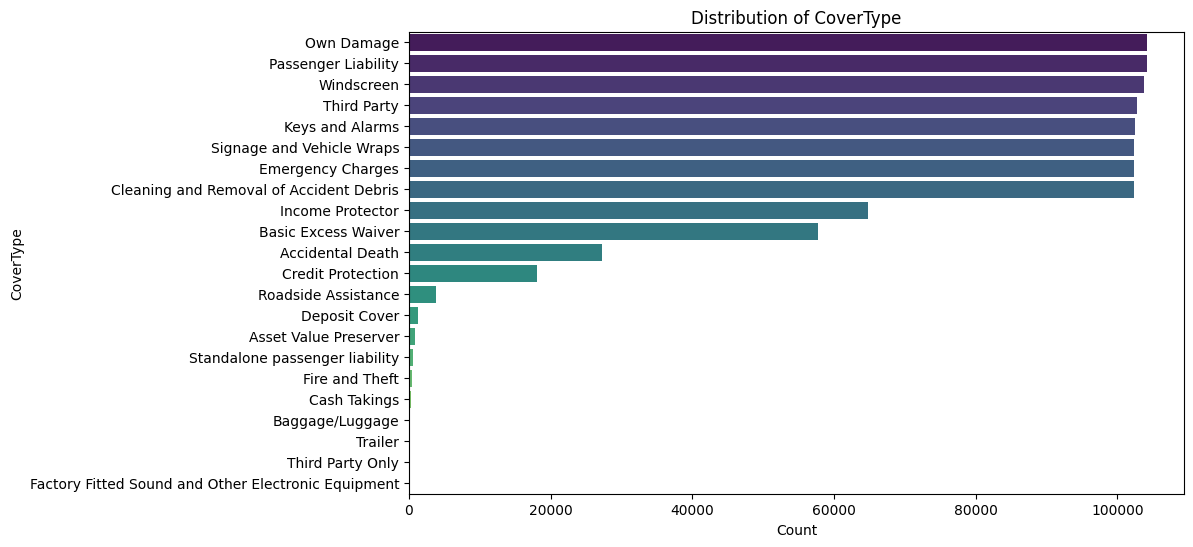

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


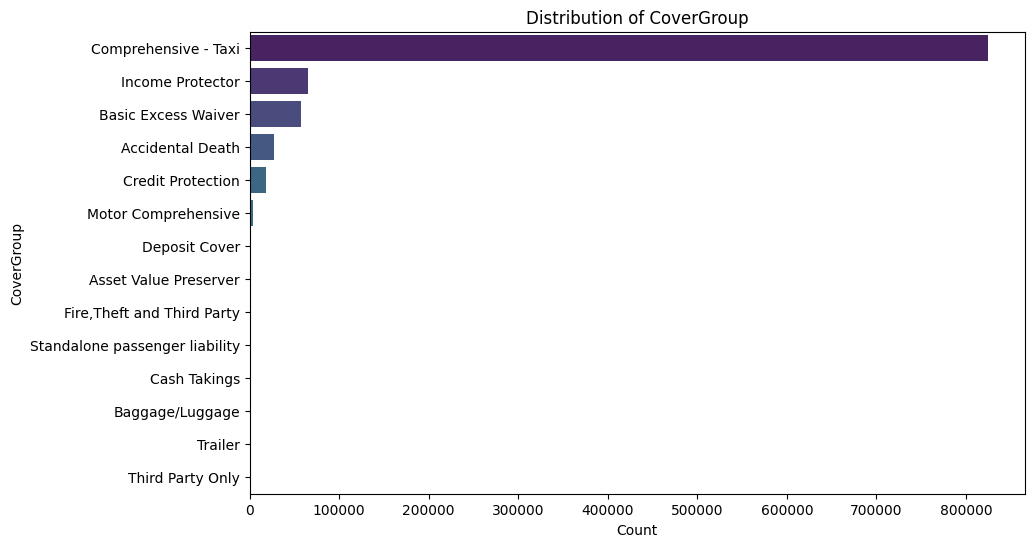

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


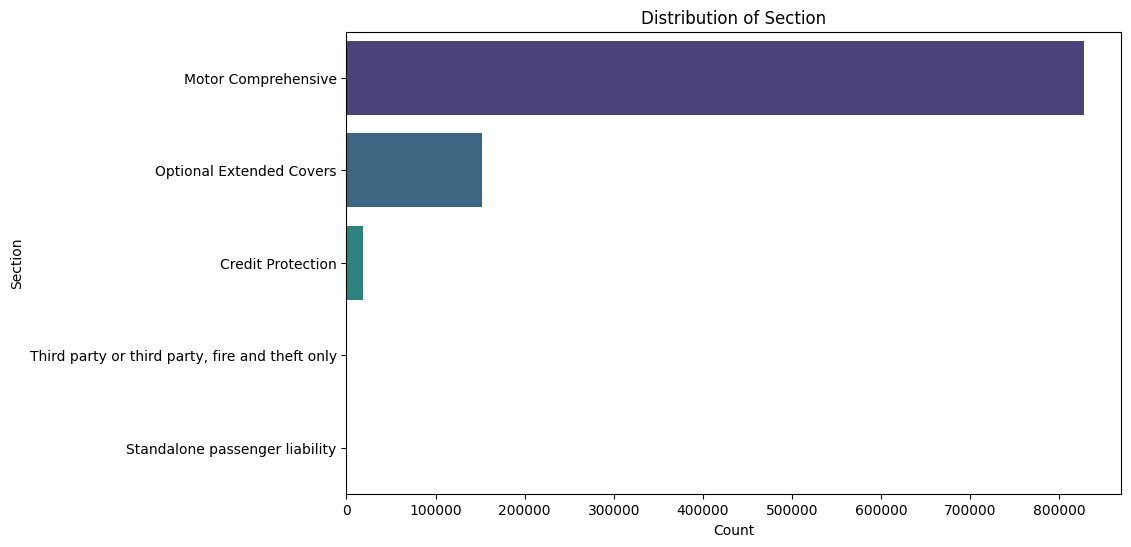

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


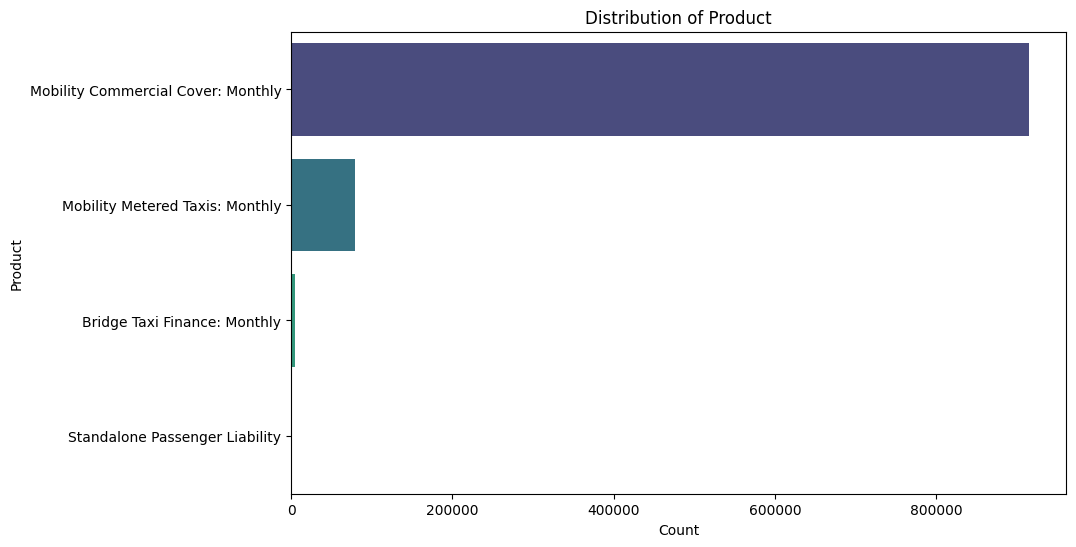

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


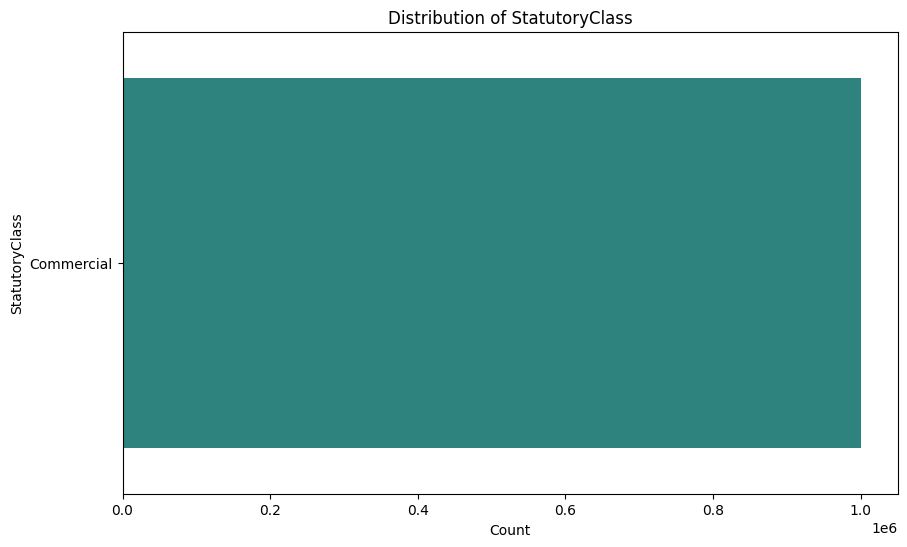

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\756544809.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')


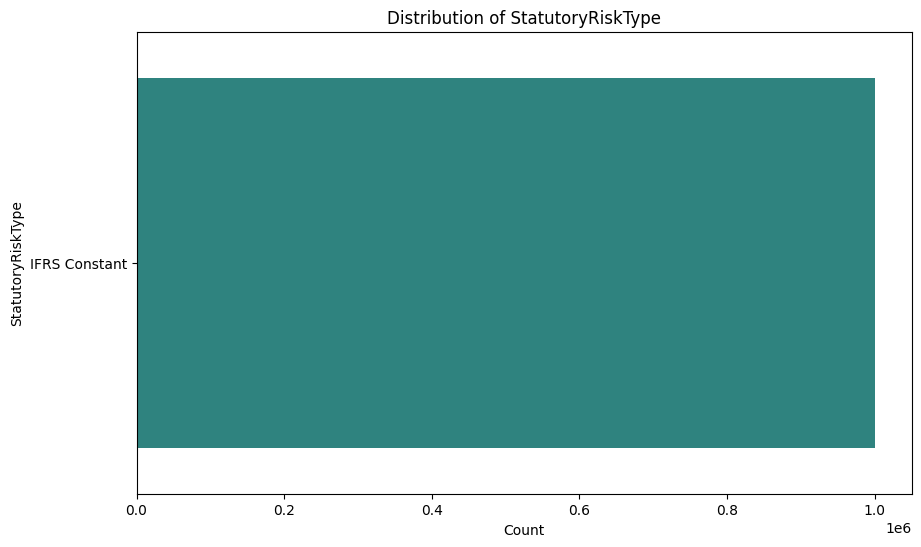

In [11]:
# Univariate Analysis for Categorical Columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=data, order=data[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()

# Bivariate Analysis


## 1. Scatter Plot of TotalPremium vs. TotalClaims


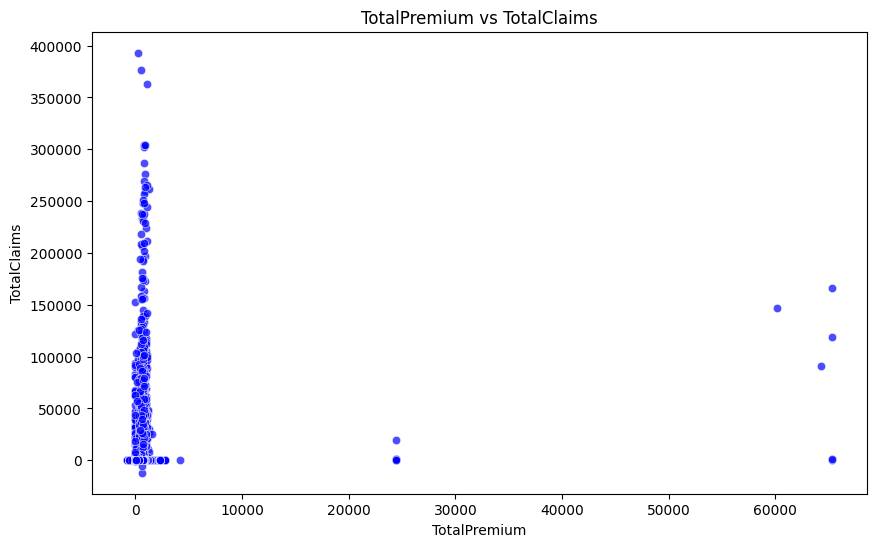

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=data, color='blue', alpha=0.7)
plt.title('TotalPremium vs TotalClaims')
plt.xlabel('TotalPremium')
plt.ylabel('TotalClaims')
plt.show()

## 2. Correlation Matrix


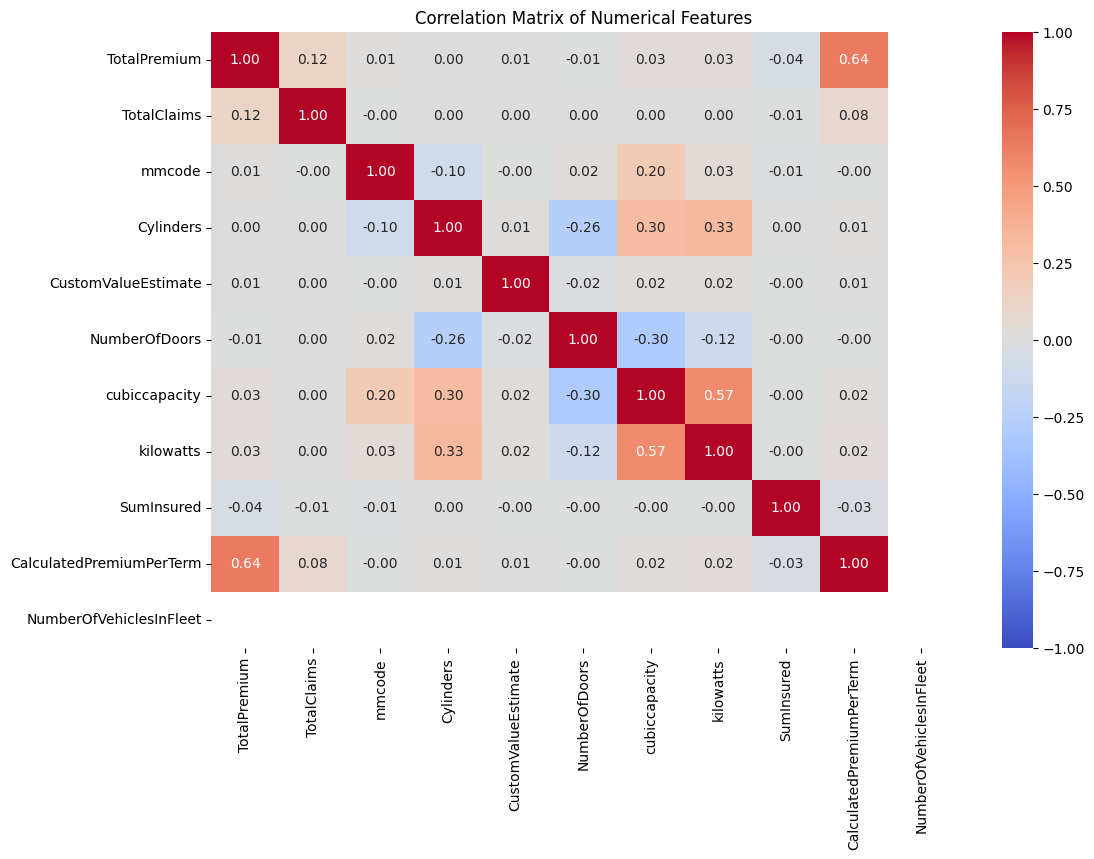

In [13]:
# Compute the correlation matrix for numerical columns
numerical_cols = ['TotalPremium', 'TotalClaims', 'mmcode', 'Cylinders', 'CustomValueEstimate', 
                  'NumberOfDoors', 'cubiccapacity', 'kilowatts', 'SumInsured', 
                  'CalculatedPremiumPerTerm', 'NumberOfVehiclesInFleet']
correlation_matrix = data[numerical_cols].corr()

# Heatmap of the Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


# Data Comparison


## 1. Compare Insurance Cover Type by Geography


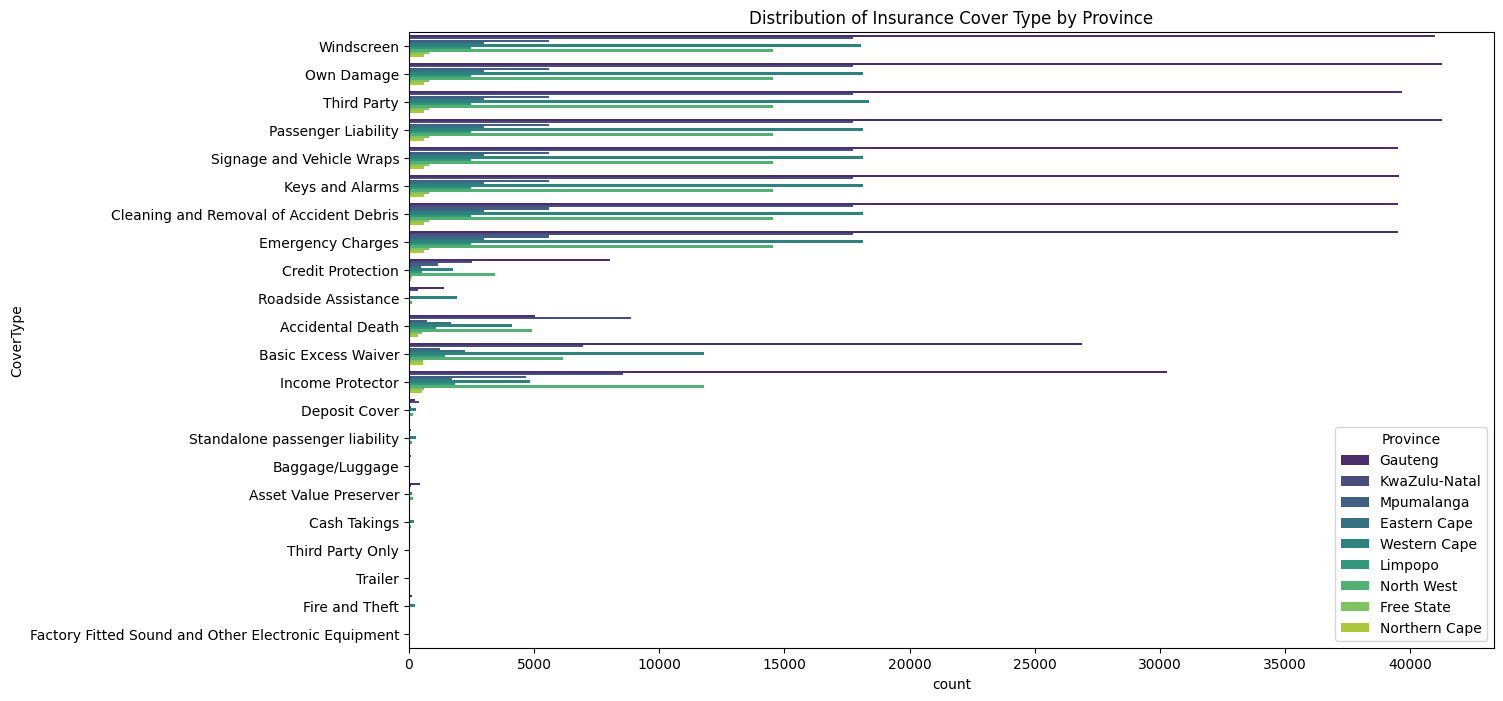

In [14]:
# Plot the distribution of insurance cover type by province
plt.figure(figsize=(14, 8))
sns.countplot(data=data, y='CoverType', hue='Province', palette='viridis')
plt.title('Distribution of Insurance Cover Type by Province')
plt.show()

## 2. Compare Premiums Across Geography


In [15]:
# Calculate average premium by province
avg_premium_by_province = data.groupby('Province')['TotalPremium'].mean().reset_index()



C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\1042775698.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Province', y='TotalPremium', data=avg_premium_by_province, palette='viridis')


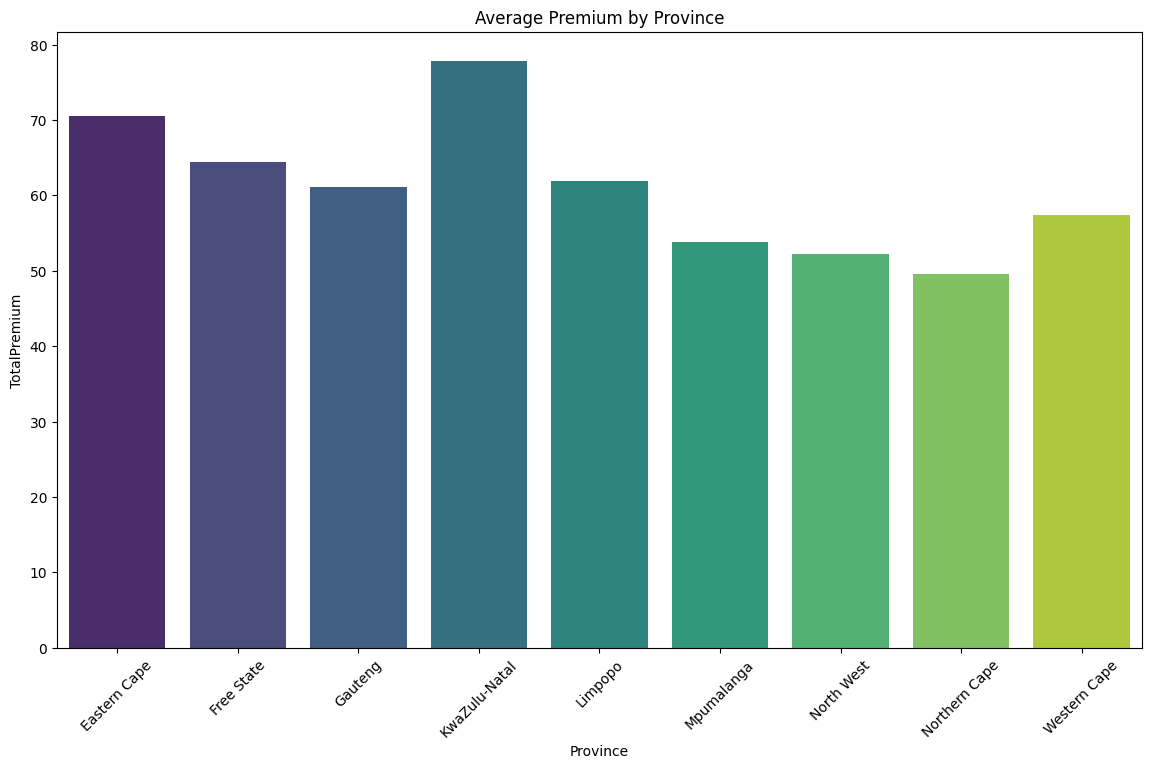

In [16]:
# Plot the average premium by province
plt.figure(figsize=(14, 8))
sns.barplot(x='Province', y='TotalPremium', data=avg_premium_by_province, palette='viridis')
plt.title('Average Premium by Province')
plt.xticks(rotation=45)
plt.show()

## 3. Compare Auto Makes Across Geography


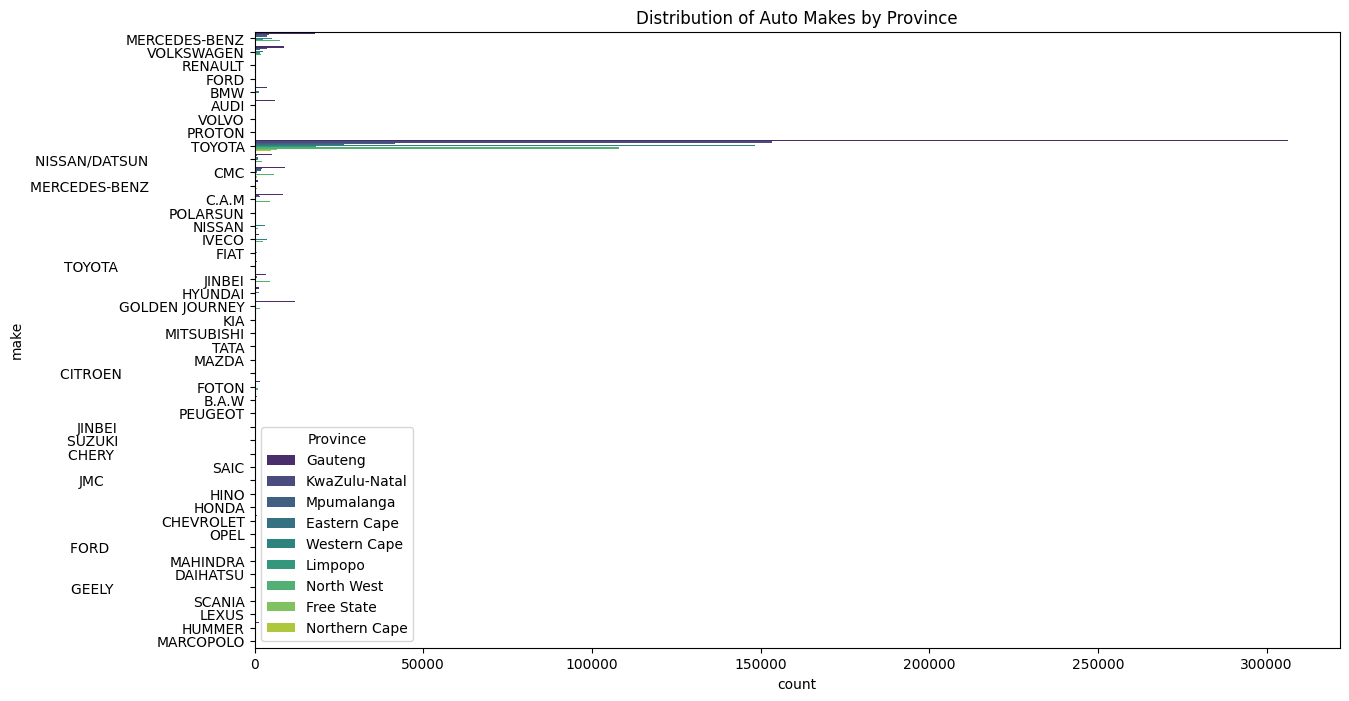

In [17]:
# Plot the distribution of auto makes by province
plt.figure(figsize=(14, 8))
sns.countplot(data=data, y='make', hue='Province', palette='viridis')
plt.title('Distribution of Auto Makes by Province')
plt.show()

# Outlier Detection

In [18]:
# List of numerical columns
numerical_cols = [
    'mmcode', 'Cylinders', 'CustomValueEstimate', 'NumberOfDoors',
    'cubiccapacity', 'kilowatts', 'SumInsured', 'CalculatedPremiumPerTerm',
    'TotalPremium', 'TotalClaims'
]

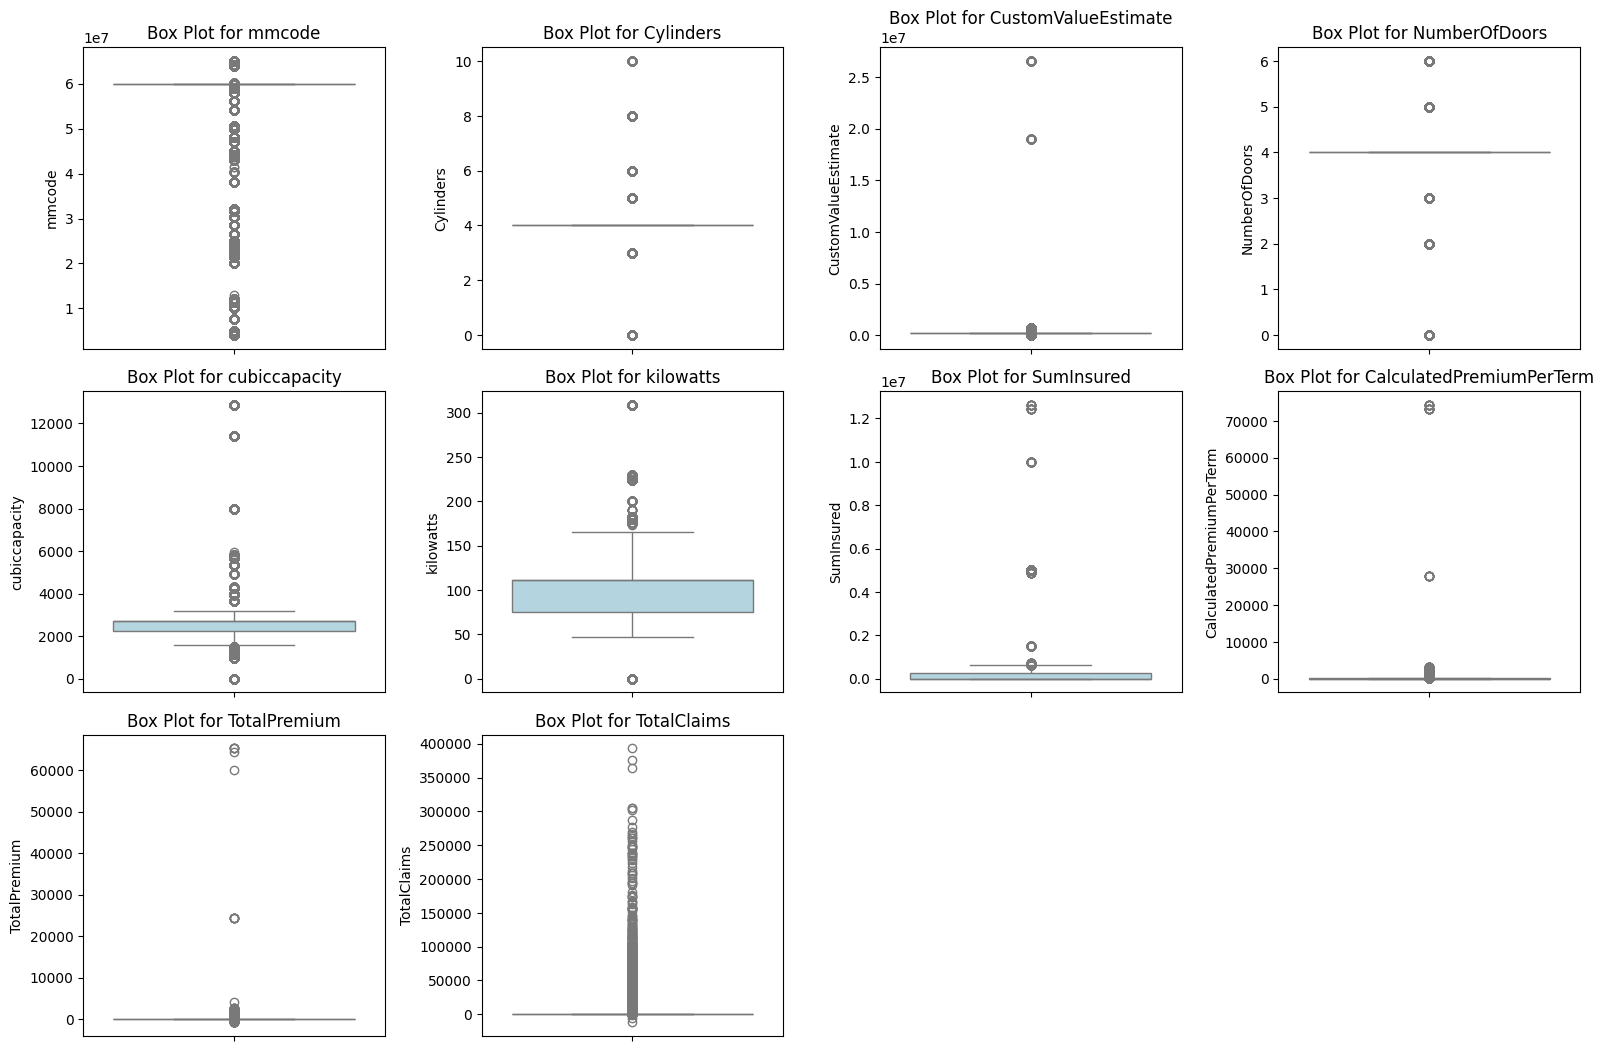

In [19]:


# Remove rows with NaN values in numerical columns to avoid plotting errors
data = data[numerical_cols].dropna()

# Plot box plots for each numerical column
plt.figure(figsize=(16, 14))  # Adjust the figure size as needed

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)  # Adjust grid size based on the number of numerical columns
    sns.boxplot(y=data[col], color='lightblue')
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()

# Visualization

## 1. Distribution of Total Premiums by Vehicle Type


In [27]:
data['VehicleType'] = data['Cylinders'].apply(lambda x: 'Low' if x <= 4 else 'High')


C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_17932\1462527661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='VehicleType', y='TotalPremium', data=data, palette='viridis')


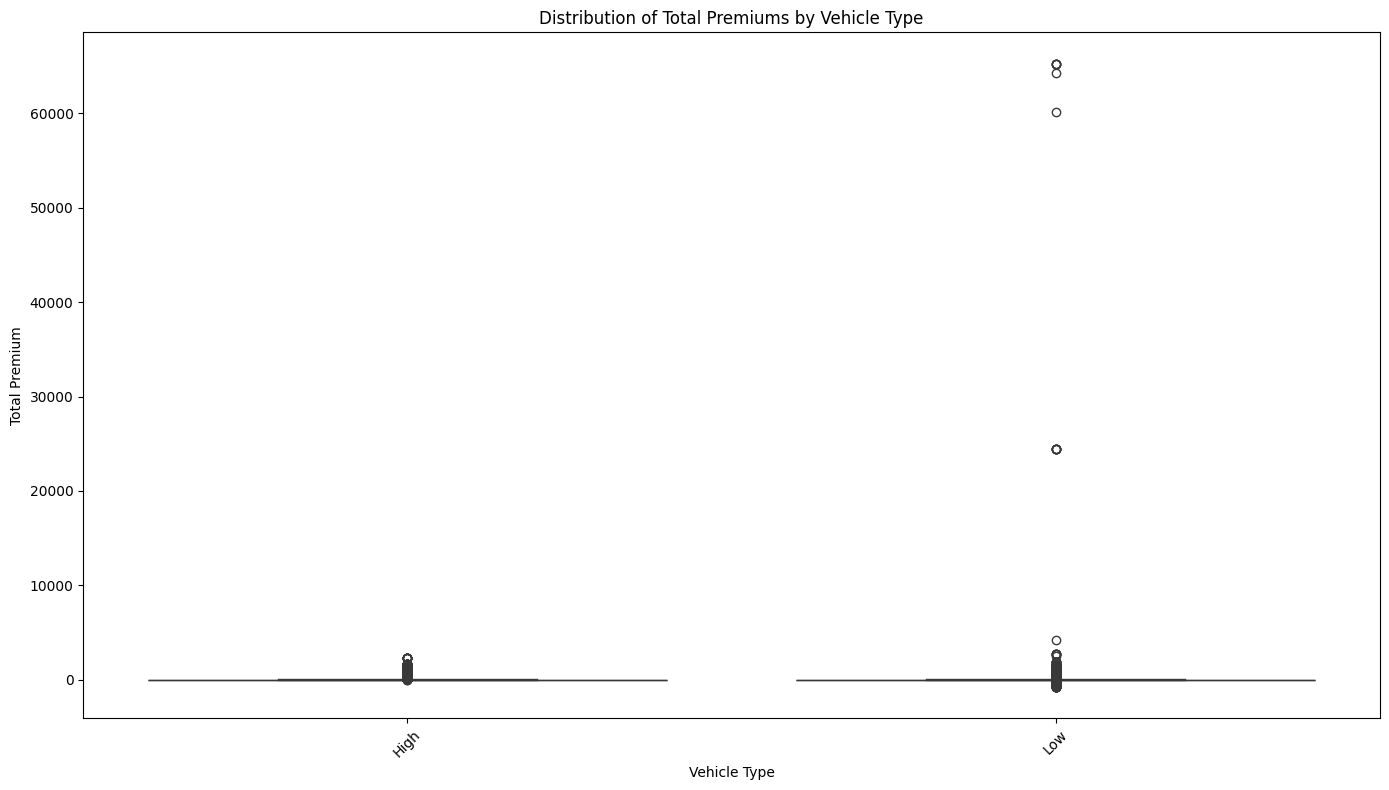

In [28]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='VehicleType', y='TotalPremium', data=data, palette='viridis')
plt.title('Distribution of Total Premiums by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Total Premium')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2. Relationship between Claims and Premiums by Gender


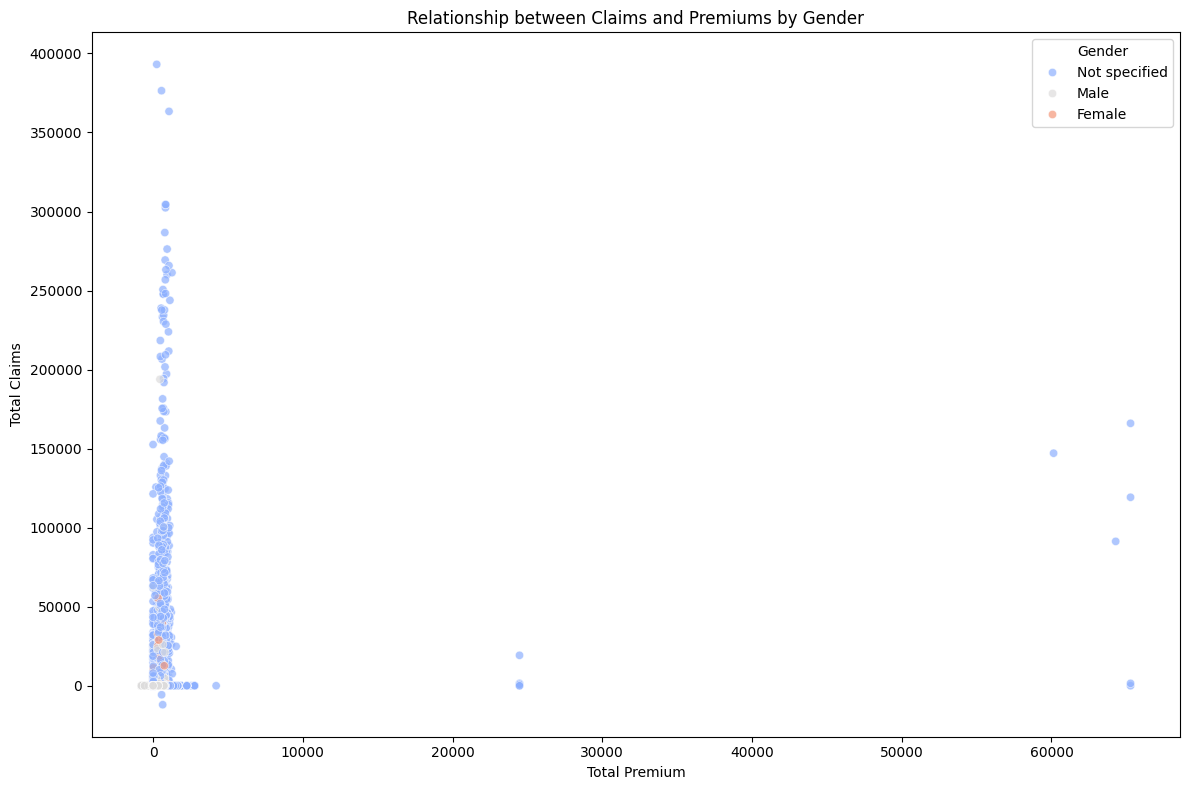

In [49]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='Gender', data=data, palette='coolwarm', alpha=0.7)
plt.title('Relationship between Claims and Premiums by Gender')
plt.xlabel('Total Premium')
plt.ylabel('Total Claims')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

## 3. Box Plot of Premiums Across Different Insurance Cover Types


C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_3328\2487516592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CoverType', y='TotalPremium', data=data, palette='pastel')


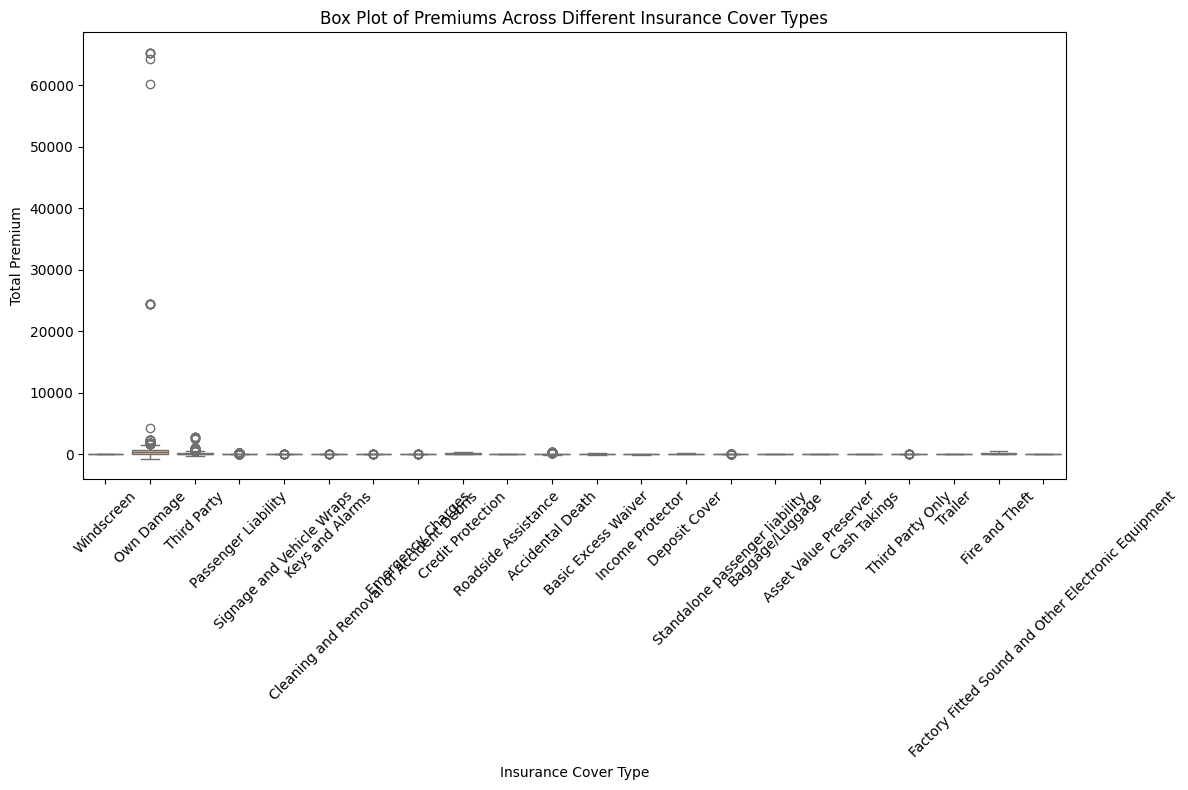

In [50]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='CoverType', y='TotalPremium', data=data, palette='pastel')
plt.title('Box Plot of Premiums Across Different Insurance Cover Types')
plt.xticks(rotation=45)
plt.xlabel('Insurance Cover Type')
plt.ylabel('Total Premium')
plt.tight_layout()
plt.show()
